Modelo de clasificación: SVM

Modelo de selección: SVM

***Pasos a seguir***

1) Preprocesamiento

2) EDA

3) Seleccionar

4) Clasificar

5) Reportar resultados


***Pasos previos***

Dataset: TCGA 27K (Muestras tumor->1 y normal->0, no metástasis)


In [ ]:
!pip install gdown

In [ ]:
import gdown
import pandas as pd

In [ ]:
#def download_files_from_gd(files_dict):
  #'''
  #- files_dict: Diccionario en formato {filename_1: drive_id_1, ...., filename_n:drive_id_n}
  #'''
  #drive_prefix = "https://drive.google.com/uc?id="
  #for file in files_dict:
    #gdown.download(f"{drive_prefix}{files_dict[file]}", file)

In [ ]:

#files = {'breast_cancer_methylation.csv':'1qJF8ejzQa6Mtq-sxuiYA7cnlYucY7sUC',
         #'data_gdc.csv':'1nxciy_BqNLEoQ85cMGMkPeAuVCV9PW-Y',
         #'breast_f.txt':'16yV38geM2bm2KpIgYnMsgZFUPkK3JVsv',
         #'utils.py': '1RHyEYj6YwKz4VKj_1tRthgjzsxW3n1oA',
         #'normal_tissue_450.csv': '1oGFHUEFF97eWO21jDSrne_o3J_E0hGfC'
         #}
#download_files_from_gd(files)

Cargamos el dataset:

In [ ]:
#df_27k_tgc = pd.read_csv('data_gdc.csv')

In [ ]:
#df_27k_tgc

In [ ]:
import pandas as pd

NuevaData = pd.read_csv('df_gdc_27k.csv', sep='\t')


In [ ]:
NuevaData

,Unnamed: 0,cg22501393,cg18895155,cg27126442,cg15264255,cg18464559,cg20379125,cg20226593,cg12790134,cg07697569,...,cg05535113,cg26848248,cg09906309,file_id,size,disease,sample_type,age,race,etnia
0,0,0.028667,0.012232,0.075894,0.142088,0.016443,0.015846,0.856759,0.117437,0.041592,...,0.111405,0.022962,0.024748,fc6a1b6d-894e-4da5-be37-2b0b76770ab1,769178,Ductal and Lobular Neoplasms,Primary Tumor,28974.0,white,not hispanic or latino
1,1,0.029441,0.014666,0.105215,0.106937,0.017454,0.016934,NaN,0.012831,0.018839,...,0.065699,0.021182,0.028579,d42a557d-a77d-4f6b-8fb9-b5b6f4b3ea87,771468,Ductal and Lobular Neoplasms,Primary Tumor,20152.0,white,not hispanic or latino
2,2,0.034916,0.018333,0.363821,0.113594,0.016953,0.018574,0.861028,0.017720,0.019870,...,0.516627,0.020363,0.029775,04e87399-3399-4fd9-93a0-7b8b4953c0c7,774870,Ductal and Lobular Neoplasms,Primary Tumor,25259.0,white,not reported
3,3,0.025584,0.014079,0.232832,0.065338,0.018666,0.147531,NaN,0.109610,0.018852,...,0.069595,0.045688,0.056429,47d4e8b4-c92b-4e06-a436-9fdc419ff70b,761724,Ductal and Lobular Neoplasms,Primary Tumor,19836.0,white,not hispanic or latino
4,4,0.027670,0.015868,0.111733,0.071436,0.021284,0.014400,NaN,0.013111,0.019075,...,0.281927,0.021215,0.025321,f947716e-8978-4e56-9a70-243b330c8e51,770436,Ductal and Lobular Neoplasms,Primary Tumor,23742.0,not reported,not reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,338,0.024973,0.015182,0.363110,0.059303,0.020070,0.013272,NaN,0.094083,0.018576,...,0.458835,0.029533,0.027838,0aa9ae96-2637-45a5-99ae-95515f803701,769491,Ductal and Lobular Neoplasms,Primary Tumor,18506.0,asian,not hispanic or latino
339,339,0.033016,0.019688,0.255833,0.083679,0.037838,0.420921,NaN,0.098259,0.028638,...,NaN,0.041958,0.034667,b9b638af-88c0-469a-b719-7171173ec201,765953,Ductal and Lobular Neoplasms,Primary Tumor,22656.0,white,not hispanic or latino
340,340,0.065614,0.016562,0.456559,0.092179,0.028890,0.015374,NaN,0.153311,0.017032,...,0.091130,0.044564,0.034887,1fa0db1b-c3ca-4d4a-8824-d75470f0b3fc,769560,Ductal and Lobular Neoplasms,Primary Tumor,29463.0,asian,not hispanic or latino
341,341,0.033278,0.022176,0.227177,0.076310,0.014749,0.015871,NaN,0.014578,0.026257,...,0.172652,0.019944,0.034445,b98a8ba1-01aa-4059-97c3-70d33eb68072,773673,Ductal and Lobular Neoplasms,Primary Tumor,13445.0,white,not hispanic or latino


eliminamos la primera columna

In [ ]:
df = NuevaData.drop(NuevaData.columns[0], axis=1)


In [ ]:
df

,cg22501393,cg18895155,cg27126442,cg15264255,cg18464559,cg20379125,cg20226593,cg12790134,cg07697569,cg13613532,...,cg05535113,cg26848248,cg09906309,file_id,size,disease,sample_type,age,race,etnia
0,0.028667,0.012232,0.075894,0.142088,0.016443,0.015846,0.856759,0.117437,0.041592,0.024423,...,0.111405,0.022962,0.024748,fc6a1b6d-894e-4da5-be37-2b0b76770ab1,769178,Ductal and Lobular Neoplasms,Primary Tumor,28974.0,white,not hispanic or latino
1,0.029441,0.014666,0.105215,0.106937,0.017454,0.016934,NaN,0.012831,0.018839,0.011539,...,0.065699,0.021182,0.028579,d42a557d-a77d-4f6b-8fb9-b5b6f4b3ea87,771468,Ductal and Lobular Neoplasms,Primary Tumor,20152.0,white,not hispanic or latino
2,0.034916,0.018333,0.363821,0.113594,0.016953,0.018574,0.861028,0.017720,0.019870,0.024152,...,0.516627,0.020363,0.029775,04e87399-3399-4fd9-93a0-7b8b4953c0c7,774870,Ductal and Lobular Neoplasms,Primary Tumor,25259.0,white,not reported
3,0.025584,0.014079,0.232832,0.065338,0.018666,0.147531,NaN,0.109610,0.018852,0.021281,...,0.069595,0.045688,0.056429,47d4e8b4-c92b-4e06-a436-9fdc419ff70b,761724,Ductal and Lobular Neoplasms,Primary Tumor,19836.0,white,not hispanic or latino
4,0.027670,0.015868,0.111733,0.071436,0.021284,0.014400,NaN,0.013111,0.019075,0.029269,...,0.281927,0.021215,0.025321,f947716e-8978-4e56-9a70-243b330c8e51,770436,Ductal and Lobular Neoplasms,Primary Tumor,23742.0,not reported,not reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.024973,0.015182,0.363110,0.059303,0.020070,0.013272,NaN,0.094083,0.018576,0.032685,...,0.458835,0.029533,0.027838,0aa9ae96-2637-45a5-99ae-95515f803701,769491,Ductal and Lobular Neoplasms,Primary Tumor,18506.0,asian,not hispanic or latino
339,0.033016,0.019688,0.255833,0.083679,0.037838,0.420921,NaN,0.098259,0.028638,0.033982,...,NaN,0.041958,0.034667,b9b638af-88c0-469a-b719-7171173ec201,765953,Ductal and Lobular Neoplasms,Primary Tumor,22656.0,white,not hispanic or latino
340,0.065614,0.016562,0.456559,0.092179,0.028890,0.015374,NaN,0.153311,0.017032,0.038485,...,0.091130,0.044564,0.034887,1fa0db1b-c3ca-4d4a-8824-d75470f0b3fc,769560,Ductal and Lobular Neoplasms,Primary Tumor,29463.0,asian,not hispanic or latino
341,0.033278,0.022176,0.227177,0.076310,0.014749,0.015871,NaN,0.014578,0.026257,0.031270,...,0.172652,0.019944,0.034445,b98a8ba1-01aa-4059-97c3-70d33eb68072,773673,Ductal and Lobular Neoplasms,Primary Tumor,13445.0,white,not hispanic or latino


In [ ]:
print(df['disease'].value_counts())

Ductal and Lobular Neoplasms             338
Complex Epithelial Neoplasms               2
Adnexal and Skin Appendage Neoplasms       1
Adenomas and Adenocarcinomas               1
Cystic, Mucinous and Serous Neoplasms      1
Name: disease, dtype: int64


Filtramos sobre la columna 'disease' del DataFrame y selecciona solo las filas donde el valor de la columna 'disease' sea igual a 'Ductal and Lobular Neoplasms' (Neoplasmas ductales y lobulillares).


In [ ]:
df = df[df['disease'] == 'Ductal and Lobular Neoplasms']

In [ ]:
df

,cg22501393,cg18895155,cg27126442,cg15264255,cg18464559,cg20379125,cg20226593,cg12790134,cg07697569,cg13613532,...,cg05535113,cg26848248,cg09906309,file_id,size,disease,sample_type,age,race,etnia
0,0.028667,0.012232,0.075894,0.142088,0.016443,0.015846,0.856759,0.117437,0.041592,0.024423,...,0.111405,0.022962,0.024748,fc6a1b6d-894e-4da5-be37-2b0b76770ab1,769178,Ductal and Lobular Neoplasms,Primary Tumor,28974.0,white,not hispanic or latino
1,0.029441,0.014666,0.105215,0.106937,0.017454,0.016934,NaN,0.012831,0.018839,0.011539,...,0.065699,0.021182,0.028579,d42a557d-a77d-4f6b-8fb9-b5b6f4b3ea87,771468,Ductal and Lobular Neoplasms,Primary Tumor,20152.0,white,not hispanic or latino
2,0.034916,0.018333,0.363821,0.113594,0.016953,0.018574,0.861028,0.017720,0.019870,0.024152,...,0.516627,0.020363,0.029775,04e87399-3399-4fd9-93a0-7b8b4953c0c7,774870,Ductal and Lobular Neoplasms,Primary Tumor,25259.0,white,not reported
3,0.025584,0.014079,0.232832,0.065338,0.018666,0.147531,NaN,0.109610,0.018852,0.021281,...,0.069595,0.045688,0.056429,47d4e8b4-c92b-4e06-a436-9fdc419ff70b,761724,Ductal and Lobular Neoplasms,Primary Tumor,19836.0,white,not hispanic or latino
4,0.027670,0.015868,0.111733,0.071436,0.021284,0.014400,NaN,0.013111,0.019075,0.029269,...,0.281927,0.021215,0.025321,f947716e-8978-4e56-9a70-243b330c8e51,770436,Ductal and Lobular Neoplasms,Primary Tumor,23742.0,not reported,not reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.024973,0.015182,0.363110,0.059303,0.020070,0.013272,NaN,0.094083,0.018576,0.032685,...,0.458835,0.029533,0.027838,0aa9ae96-2637-45a5-99ae-95515f803701,769491,Ductal and Lobular Neoplasms,Primary Tumor,18506.0,asian,not hispanic or latino
339,0.033016,0.019688,0.255833,0.083679,0.037838,0.420921,NaN,0.098259,0.028638,0.033982,...,NaN,0.041958,0.034667,b9b638af-88c0-469a-b719-7171173ec201,765953,Ductal and Lobular Neoplasms,Primary Tumor,22656.0,white,not hispanic or latino
340,0.065614,0.016562,0.456559,0.092179,0.028890,0.015374,NaN,0.153311,0.017032,0.038485,...,0.091130,0.044564,0.034887,1fa0db1b-c3ca-4d4a-8824-d75470f0b3fc,769560,Ductal and Lobular Neoplasms,Primary Tumor,29463.0,asian,not hispanic or latino
341,0.033278,0.022176,0.227177,0.076310,0.014749,0.015871,NaN,0.014578,0.026257,0.031270,...,0.172652,0.019944,0.034445,b98a8ba1-01aa-4059-97c3-70d33eb68072,773673,Ductal and Lobular Neoplasms,Primary Tumor,13445.0,white,not hispanic or latino


In [ ]:
print(df['disease'].value_counts())

Ductal and Lobular Neoplasms    338
Name: disease, dtype: int64


Se asigna el valor 0 a la columna 'tumor' si el valor de 'sample_type' es 'Solid Tissue Normal' y asigna el valor 1 en todos los demás casos. Esto puede indicar si una muestra corresponde a tejido sólido normal (no tumoral) o a un tumor

In [ ]:
df['tumor'] = df['sample_type'].apply(lambda x: 0 if x == 'Solid Tissue Normal' else 1)

C:\Users\bluea\AppData\Local\Temp\ipykernel_24608\2169536530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tumor'] = df['sample_type'].apply(lambda x: 0 if x == 'Solid Tissue Normal' else 1)


In [ ]:
df

,cg22501393,cg18895155,cg27126442,cg15264255,cg18464559,cg20379125,cg20226593,cg12790134,cg07697569,cg13613532,...,cg26848248,cg09906309,file_id,size,disease,sample_type,age,race,etnia,tumor
0,0.028667,0.012232,0.075894,0.142088,0.016443,0.015846,0.856759,0.117437,0.041592,0.024423,...,0.022962,0.024748,fc6a1b6d-894e-4da5-be37-2b0b76770ab1,769178,Ductal and Lobular Neoplasms,Primary Tumor,28974.0,white,not hispanic or latino,1
1,0.029441,0.014666,0.105215,0.106937,0.017454,0.016934,NaN,0.012831,0.018839,0.011539,...,0.021182,0.028579,d42a557d-a77d-4f6b-8fb9-b5b6f4b3ea87,771468,Ductal and Lobular Neoplasms,Primary Tumor,20152.0,white,not hispanic or latino,1
2,0.034916,0.018333,0.363821,0.113594,0.016953,0.018574,0.861028,0.017720,0.019870,0.024152,...,0.020363,0.029775,04e87399-3399-4fd9-93a0-7b8b4953c0c7,774870,Ductal and Lobular Neoplasms,Primary Tumor,25259.0,white,not reported,1
3,0.025584,0.014079,0.232832,0.065338,0.018666,0.147531,NaN,0.109610,0.018852,0.021281,...,0.045688,0.056429,47d4e8b4-c92b-4e06-a436-9fdc419ff70b,761724,Ductal and Lobular Neoplasms,Primary Tumor,19836.0,white,not hispanic or latino,1
4,0.027670,0.015868,0.111733,0.071436,0.021284,0.014400,NaN,0.013111,0.019075,0.029269,...,0.021215,0.025321,f947716e-8978-4e56-9a70-243b330c8e51,770436,Ductal and Lobular Neoplasms,Primary Tumor,23742.0,not reported,not reported,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.024973,0.015182,0.363110,0.059303,0.020070,0.013272,NaN,0.094083,0.018576,0.032685,...,0.029533,0.027838,0aa9ae96-2637-45a5-99ae-95515f803701,769491,Ductal and Lobular Neoplasms,Primary Tumor,18506.0,asian,not hispanic or latino,1
339,0.033016,0.019688,0.255833,0.083679,0.037838,0.420921,NaN,0.098259,0.028638,0.033982,...,0.041958,0.034667,b9b638af-88c0-469a-b719-7171173ec201,765953,Ductal and Lobular Neoplasms,Primary Tumor,22656.0,white,not hispanic or latino,1
340,0.065614,0.016562,0.456559,0.092179,0.028890,0.015374,NaN,0.153311,0.017032,0.038485,...,0.044564,0.034887,1fa0db1b-c3ca-4d4a-8824-d75470f0b3fc,769560,Ductal and Lobular Neoplasms,Primary Tumor,29463.0,asian,not hispanic or latino,1
341,0.033278,0.022176,0.227177,0.076310,0.014749,0.015871,NaN,0.014578,0.026257,0.031270,...,0.019944,0.034445,b98a8ba1-01aa-4059-97c3-70d33eb68072,773673,Ductal and Lobular Neoplasms,Primary Tumor,13445.0,white,not hispanic or latino,1


In [ ]:
# Contar los valores de tumor
tumor_counts = df['tumor'].value_counts()

# Imprimir el balance
print("Balance de tumor:")
tumor_counts



Balance de tumor:


1    312
0     26
Name: tumor, dtype: int64

In [ ]:
# Eliminar las columnas especificadas
#df = df.drop(["file_id", "size", "disease", "sample_type", "cancer"], axis=1)
#df = df.drop(["file_id", "size", "disease", "sample_type"], axis=1)
df = df.drop(["file_id", "size"], axis=1)

In [ ]:
df

,cg22501393,cg18895155,cg27126442,cg15264255,cg18464559,cg20379125,cg20226593,cg12790134,cg07697569,cg13613532,...,cg08096038,cg05535113,cg26848248,cg09906309,disease,sample_type,age,race,etnia,tumor
0,0.028667,0.012232,0.075894,0.142088,0.016443,0.015846,0.856759,0.117437,0.041592,0.024423,...,NaN,0.111405,0.022962,0.024748,Ductal and Lobular Neoplasms,Primary Tumor,28974.0,white,not hispanic or latino,1
1,0.029441,0.014666,0.105215,0.106937,0.017454,0.016934,NaN,0.012831,0.018839,0.011539,...,0.935605,0.065699,0.021182,0.028579,Ductal and Lobular Neoplasms,Primary Tumor,20152.0,white,not hispanic or latino,1
2,0.034916,0.018333,0.363821,0.113594,0.016953,0.018574,0.861028,0.017720,0.019870,0.024152,...,0.914402,0.516627,0.020363,0.029775,Ductal and Lobular Neoplasms,Primary Tumor,25259.0,white,not reported,1
3,0.025584,0.014079,0.232832,0.065338,0.018666,0.147531,NaN,0.109610,0.018852,0.021281,...,0.932054,0.069595,0.045688,0.056429,Ductal and Lobular Neoplasms,Primary Tumor,19836.0,white,not hispanic or latino,1
4,0.027670,0.015868,0.111733,0.071436,0.021284,0.014400,NaN,0.013111,0.019075,0.029269,...,0.916900,0.281927,0.021215,0.025321,Ductal and Lobular Neoplasms,Primary Tumor,23742.0,not reported,not reported,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.024973,0.015182,0.363110,0.059303,0.020070,0.013272,NaN,0.094083,0.018576,0.032685,...,0.897545,0.458835,0.029533,0.027838,Ductal and Lobular Neoplasms,Primary Tumor,18506.0,asian,not hispanic or latino,1
339,0.033016,0.019688,0.255833,0.083679,0.037838,0.420921,NaN,0.098259,0.028638,0.033982,...,0.874432,NaN,0.041958,0.034667,Ductal and Lobular Neoplasms,Primary Tumor,22656.0,white,not hispanic or latino,1
340,0.065614,0.016562,0.456559,0.092179,0.028890,0.015374,NaN,0.153311,0.017032,0.038485,...,0.939336,0.091130,0.044564,0.034887,Ductal and Lobular Neoplasms,Primary Tumor,29463.0,asian,not hispanic or latino,1
341,0.033278,0.022176,0.227177,0.076310,0.014749,0.015871,NaN,0.014578,0.026257,0.031270,...,0.925903,0.172652,0.019944,0.034445,Ductal and Lobular Neoplasms,Primary Tumor,13445.0,white,not hispanic or latino,1


In [ ]:
df.dtypes

cg22501393     float64
cg18895155     float64
cg27126442     float64
cg15264255     float64
cg18464559     float64
                ...   
sample_type     object
age            float64
race            object
etnia           object
tumor            int64
Length: 27584, dtype: object

In [ ]:
import numpy as np
import pandas as pd

# Rellena los valores faltantes con ceros
df = df.fillna(0)
# columna 'tumor' de un DataFrame en enteros y
df['tumor'] = df['tumor'].astype(int)
#df['disease'] = df['disease'].astype(int)
#df['sample_type'] = df['sample_type'].astype(int)

In [ ]:
df

,cg22501393,cg18895155,cg27126442,cg15264255,cg18464559,cg20379125,cg20226593,cg12790134,cg07697569,cg13613532,...,cg08096038,cg05535113,cg26848248,cg09906309,disease,sample_type,age,race,etnia,tumor
0,0.028667,0.012232,0.075894,0.142088,0.016443,0.015846,0.856759,0.117437,0.041592,0.024423,...,0.000000,0.111405,0.022962,0.024748,Ductal and Lobular Neoplasms,Primary Tumor,28974.0,white,not hispanic or latino,1
1,0.029441,0.014666,0.105215,0.106937,0.017454,0.016934,0.000000,0.012831,0.018839,0.011539,...,0.935605,0.065699,0.021182,0.028579,Ductal and Lobular Neoplasms,Primary Tumor,20152.0,white,not hispanic or latino,1
2,0.034916,0.018333,0.363821,0.113594,0.016953,0.018574,0.861028,0.017720,0.019870,0.024152,...,0.914402,0.516627,0.020363,0.029775,Ductal and Lobular Neoplasms,Primary Tumor,25259.0,white,not reported,1
3,0.025584,0.014079,0.232832,0.065338,0.018666,0.147531,0.000000,0.109610,0.018852,0.021281,...,0.932054,0.069595,0.045688,0.056429,Ductal and Lobular Neoplasms,Primary Tumor,19836.0,white,not hispanic or latino,1
4,0.027670,0.015868,0.111733,0.071436,0.021284,0.014400,0.000000,0.013111,0.019075,0.029269,...,0.916900,0.281927,0.021215,0.025321,Ductal and Lobular Neoplasms,Primary Tumor,23742.0,not reported,not reported,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.024973,0.015182,0.363110,0.059303,0.020070,0.013272,0.000000,0.094083,0.018576,0.032685,...,0.897545,0.458835,0.029533,0.027838,Ductal and Lobular Neoplasms,Primary Tumor,18506.0,asian,not hispanic or latino,1
339,0.033016,0.019688,0.255833,0.083679,0.037838,0.420921,0.000000,0.098259,0.028638,0.033982,...,0.874432,0.000000,0.041958,0.034667,Ductal and Lobular Neoplasms,Primary Tumor,22656.0,white,not hispanic or latino,1
340,0.065614,0.016562,0.456559,0.092179,0.028890,0.015374,0.000000,0.153311,0.017032,0.038485,...,0.939336,0.091130,0.044564,0.034887,Ductal and Lobular Neoplasms,Primary Tumor,29463.0,asian,not hispanic or latino,1
341,0.033278,0.022176,0.227177,0.076310,0.014749,0.015871,0.000000,0.014578,0.026257,0.031270,...,0.925903,0.172652,0.019944,0.034445,Ductal and Lobular Neoplasms,Primary Tumor,13445.0,white,not hispanic or latino,1


In [ ]:
num_nan = df['disease'].isnull().sum()
print("Número de valores NaN en la columna 'disease':", num_nan)

Número de valores NaN en la columna 'disease': 0


Aplicar MinMaxScaler a la variable "age"

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Crear una copia del DataFrame
df_scaled = df.copy()

# Obtener la columna "age"
age = df_scaled['age']

# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Aplicar MinMaxScaler a la variable "age"
age_scaled = scaler.fit_transform(age.values.reshape(-1, 1))

# Reemplazar la columna "age" en el DataFrame original con la versión escalada
df_scaled['age'] = age_scaled

# Imprimir el DataFrame con la variable "age" escalada
df_scaled



,cg22501393,cg18895155,cg27126442,cg15264255,cg18464559,cg20379125,cg20226593,cg12790134,cg07697569,cg13613532,...,cg08096038,cg05535113,cg26848248,cg09906309,disease,sample_type,age,race,etnia,tumor
0,0.028667,0.012232,0.075894,0.142088,0.016443,0.015846,0.856759,0.117437,0.041592,0.024423,...,0.000000,0.111405,0.022962,0.024748,Ductal and Lobular Neoplasms,Primary Tumor,0.881419,white,not hispanic or latino,1
1,0.029441,0.014666,0.105215,0.106937,0.017454,0.016934,0.000000,0.012831,0.018839,0.011539,...,0.935605,0.065699,0.021182,0.028579,Ductal and Lobular Neoplasms,Primary Tumor,0.613045,white,not hispanic or latino,1
2,0.034916,0.018333,0.363821,0.113594,0.016953,0.018574,0.861028,0.017720,0.019870,0.024152,...,0.914402,0.516627,0.020363,0.029775,Ductal and Lobular Neoplasms,Primary Tumor,0.768405,white,not reported,1
3,0.025584,0.014079,0.232832,0.065338,0.018666,0.147531,0.000000,0.109610,0.018852,0.021281,...,0.932054,0.069595,0.045688,0.056429,Ductal and Lobular Neoplasms,Primary Tumor,0.603431,white,not hispanic or latino,1
4,0.027670,0.015868,0.111733,0.071436,0.021284,0.014400,0.000000,0.013111,0.019075,0.029269,...,0.916900,0.281927,0.021215,0.025321,Ductal and Lobular Neoplasms,Primary Tumor,0.722256,not reported,not reported,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.024973,0.015182,0.363110,0.059303,0.020070,0.013272,0.000000,0.094083,0.018576,0.032685,...,0.897545,0.458835,0.029533,0.027838,Ductal and Lobular Neoplasms,Primary Tumor,0.562972,asian,not hispanic or latino,1
339,0.033016,0.019688,0.255833,0.083679,0.037838,0.420921,0.000000,0.098259,0.028638,0.033982,...,0.874432,0.000000,0.041958,0.034667,Ductal and Lobular Neoplasms,Primary Tumor,0.689219,white,not hispanic or latino,1
340,0.065614,0.016562,0.456559,0.092179,0.028890,0.015374,0.000000,0.153311,0.017032,0.038485,...,0.939336,0.091130,0.044564,0.034887,Ductal and Lobular Neoplasms,Primary Tumor,0.896295,asian,not hispanic or latino,1
341,0.033278,0.022176,0.227177,0.076310,0.014749,0.015871,0.000000,0.014578,0.026257,0.031270,...,0.925903,0.172652,0.019944,0.034445,Ductal and Lobular Neoplasms,Primary Tumor,0.409011,white,not hispanic or latino,1


In [ ]:
seed = 1234 #Semilla para reproducibilidad

***Selección con SVM***

. Parece que el estimador SVC no proporciona directamente el atributo coef_ cuando se utiliza un kernel no lineal, lo cual es el caso en los clasificadores SVM con kernel polinomial y gaussiano (RBF).

Realizamos una clasificación de datos utilizando un modelo de clasificador de vectores de soporte (SVC) con un kernel lineal. Antes se realiza el preprocesamiento de las columnas numéricas utilizando StandardScaler()

El código siguiente implementa un clasificador SVM (Support Vector Machine) utilizando selección de características y realiza predicciones en un conjunto de prueba:

Selección: SVC con kernel lineal (linear_svc)

Clasificacion: SVC con kernel RBF (rbf)

El siguiente código realiza la selección de características utilizando un clasificador LinearSVC, transforma y preprocesa los datos seleccionados, y entrena un modelo SVM para la clasificación. Luego, se utilizan las métricas de evaluación para evaluar el rendimiento del modelo en el conjunto de prueba.

Este código realiza las siguientes tareas:

1) Importación de bibliotecas necesarias.

2) Separación de los atributos y las etiquetas del conjunto de datos.

3) Realización de codificación one-hot para las columnas categóricas en los atributos.

4) División de los datos en conjuntos de entrenamiento y prueba.

5) Creación de un clasificador SVC con kernel lineal.

6) Creación de un selector de características basado en el clasificador LinearSVC.

7) Ajuste del selector y transformación del conjunto de datos de entrenamiento para mantener solo las características seleccionadas.

8) Obtención de los índices y nombres de las características seleccionadas.

9) Creación de un preprocesador para aplicar el escalado estándar a las características numéricas seleccionadas y pasar las demás características sin cambios.

10) Creación de un pipeline que combina el preprocesador y el clasificador SVC con kernel RBF.

11) Ajuste del modelo con los datos de entrenamiento.

12) Realización de predicciones en el conjunto de prueba.

13) Obtención de un informe de clasificación que muestra métricas.

 Preparación de datos, incluyendo codificación one-hot, manejo de valores faltantes, escalado de características y equilibrado de clases utilizando SMOTE. Luego, utiliza un clasificador LinearSVC para seleccionar características basadas en el coeficiente de peso asignado por el clasificador. El dataset resultante se utiliza para entrenar un modelo SVM y se evalúa su rendimiento en un conjunto de prueba utilizando el informe de clasificación:

In [ ]:
#df_scaled

In [ ]:
#print(df_scaled['disease'])
#print(df_scaled['sample_type'])


In [ ]:
print(df_scaled['disease'].value_counts())
print(df_scaled['sample_type'].value_counts())

Ductal and Lobular Neoplasms    338
Name: disease, dtype: int64
Primary Tumor          310
Solid Tissue Normal     26
Metastatic               2
Name: sample_type, dtype: int64


dim df_scaled: (338, 27584)
ORIGINAL: (343, 27591)
Dimensiones del dataset original: (333, 27590)
Dimensiones del dataset seleccionado: (614, 7657)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        87
         1.0       1.00      1.00      1.00        98

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



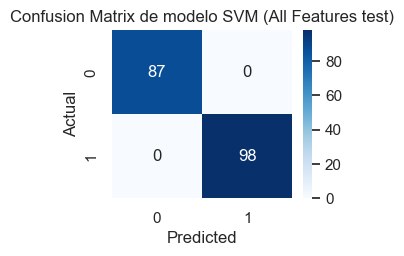

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, cohen_kappa_score, roc_auc_score

# Crear una copia del DataFrame
df_scaled = df.copy()

# Obtener la columna "age"
age = df_scaled['age']

# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Aplicar MinMaxScaler a la variable "age"
age_scaled = scaler.fit_transform(age.values.reshape(-1, 1))

# Reemplazar la columna "age" en el DataFrame original con la versión escalada
df_scaled['age'] = age_scaled

# Imprimir el DataFrame con la variable "age" escalada
print("dim df_scaled:", df_scaled.shape)

# Copiar el DataFrame original a df_iris
df_iris = df_scaled.copy()

# Crear una copia del DataFrame
df_iris_encoded = df_iris.copy()

# Realizar codificación one-hot para las columnas categóricas
categorical_cols = df_iris_encoded.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore')
df_encoded = pd.DataFrame(encoder.fit_transform(df_iris_encoded[categorical_cols]).toarray(),
                          columns=encoder.get_feature_names_out(categorical_cols))
df_iris_encoded.drop(columns=categorical_cols, inplace=True)
df_iris_encoded = pd.concat([df_iris_encoded, df_encoded], axis=1)

# Imprimir las dimensiones del dataset seleccionado
print("ORIGINAL:", df_iris_encoded.shape)

# Separar los atributos de las etiquetas
X = df_iris_encoded.drop('tumor', axis=1)
Y = df_iris_encoded['tumor']

# Eliminar filas con valores NaN en la columna objetivo
df_cleaned = pd.concat([X, Y], axis=1).dropna()
X = df_cleaned.drop('tumor', axis=1)
Y = df_cleaned['tumor']

# Mantener la variable "age" en el conjunto de atributos
X['age'] = df_cleaned['age']

# Crear el clasificador LinearSVC
linear_svc = LinearSVC()

# Crear el selector de características basado en LinearSVC
selector = SelectFromModel(linear_svc)

# Ajustar el selector y transformar el dataset
X_selected = selector.fit_transform(X, Y)

# Obtener los nombres de las características seleccionadas
selected_feature_names = X.columns[selector.get_support()]

# Filtrar el DataFrame original con las características seleccionadas
X_selected = X[selected_feature_names]

# Crear un nuevo DataFrame con las características seleccionadas y las etiquetas originales
df_selected = pd.concat([X_selected, Y], axis=1)

# Escalado de características
sc = StandardScaler()
x_selected = sc.fit_transform(df_selected)

# Manejo del desequilibrio de clases con SMOTE
oversample = SMOTE(k_neighbors=3)
x_selected, Y = oversample.fit_resample(x_selected, Y)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_selected, Y, test_size=0.3, random_state=42)

# Imprimir
print("Dimensiones del dataset original:", X.shape)
print("Dimensiones del dataset seleccionado:", x_selected.shape)

# Crear el clasificador SVM
svm = SVC(kernel='rbf')

# Ajustar el modelo SVM
svm.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm.predict(X_test)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))


# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)



# Crear el mapa de calor de la matriz de confusión
plt.subplot(2, 2, 3)
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix de modelo SVM (All Features test)")

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Obtener los valores de la matriz de confusión
tn, fp, fn, tp = confusion.ravel()





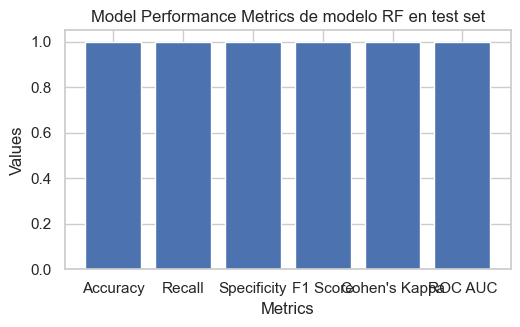

In [ ]:
# Calcular las métricas de rendimiento
accuracy = round((tp + tn) / (tn + fp + tp + fn), 2)
recall = round(tp / (tp + fn), 2)
specificity = round(tn / (tn + fp), 2)
f1 = round(f1_score(y_test, y_pred), 2)
cohen_kappa = round(cohen_kappa_score(y_test, y_pred), 2)
roc_auc = round(roc_auc_score(y_test, y_pred), 2)

# Crear gráfico de barras
metrics = ["Accuracy", "Recall", "Specificity", "F1 Score", "Cohen's Kappa", "ROC AUC"]
values = [accuracy, recall, specificity, f1, cohen_kappa, roc_auc]

# Crear gráfico de barras más grande
plt.figure(figsize=(10, 6))  # Ajustar el tamaño según tus necesidades


plt.subplot(2, 2, 4)
plt.bar(metrics, values)
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Model Performance Metrics de modelo RF en test set")

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [ ]:
datita = pd.DataFrame(df_selected)
datita

,cg20226593,cg01805282,cg07378350,cg18752854,cg09495977,cg23680518,cg25141490,cg14920846,cg10187559,cg09018810,...,sample_type_Metastatic,sample_type_Primary Tumor,sample_type_Solid Tissue Normal,race_asian,race_black or african american,race_not reported,race_white,etnia_not hispanic or latino,etnia_not reported,tumor
0,0.856759,0.037711,0.432108,0.099029,0.381281,0.281168,0.212070,0.115236,0.092288,0.150298,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.000000,0.025147,0.074760,0.221899,0.016008,0.182303,0.589614,0.262861,0.062846,0.184263,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0.861028,0.666991,0.399974,0.373992,0.038127,0.647516,0.519554,0.430079,0.000000,0.484827,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.000000,0.367608,0.086897,0.189885,0.608663,0.342419,0.138914,0.237147,0.000000,0.282812,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,0.000000,0.535712,0.093282,0.154174,0.630391,0.367586,0.251629,0.220982,0.805065,0.510981,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0.863214,0.150876,0.252797,0.450943,0.124692,0.540162,0.479465,0.285260,0.000000,0.487765,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
334,0.000000,0.848428,0.038761,0.559343,0.045041,0.108197,0.598725,0.062602,0.075466,0.043709,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
335,0.863051,0.023022,0.092806,0.199859,0.395916,0.486109,0.427025,0.155580,0.137488,0.582261,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
336,0.000000,0.620857,0.215247,0.285170,0.426244,0.788799,0.414516,0.334547,0.000000,0.016083,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [ ]:
print(datita.columns)

Index(['cg20226593', 'cg01805282', 'cg07378350', 'cg18752854', 'cg09495977',
       'cg23680518', 'cg25141490', 'cg14920846', 'cg10187559', 'cg09018810',
       ...
       'sample_type_Metastatic', 'sample_type_Primary Tumor',
       'sample_type_Solid Tissue Normal', 'race_asian',
       'race_black or african american', 'race_not reported', 'race_white',
       'etnia_not hispanic or latino', 'etnia_not reported', 'tumor'],
      dtype='object', length=7656)


In [ ]:
#print(datita['disease_Ductal and Lobular Neoplasms'].value_counts())
print(datita['sample_type_Primary Tumor'].value_counts())

1.0    305
0.0     28
Name: sample_type_Primary Tumor, dtype: int64


In [ ]:
# Obtener manifiesto de maquina Illumina 450k
url = 'https://webdata.illumina.com/downloads/productfiles/humanmethylation450/humanmethylation450_15017482_v1-2.csv'
url_27k = "https://support.illumina.com/content/dam/illumina-support/documents/downloads/productfiles/humanmethylation27/productsupportfiles/illumina_humanmethylation27_content.xlsx"
manifest = pd.read_csv(url, skiprows = 7)
manifest.head()

C:\Users\bluea\AppData\Local\Temp\ipykernel_24608\3346863949.py:4: DtypeWarning: Columns (2,4,11,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  manifest = pd.read_csv(url, skiprows = 7)


,IlmnID,Name,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,Infinium_Design_Type,Next_Base,Color_Channel,Forward_Sequence,...,UCSC_RefGene_Group,UCSC_CpG_Islands_Name,Relation_to_UCSC_CpG_Island,Phantom,DMR,Enhancer,HMM_Island,Regulatory_Feature_Name,Regulatory_Feature_Group,DHS
0,cg00035864,cg00035864,31729416,AAAACACTAACAATCTTATCCACATAAACCCTTAAATTTATCTCAA...,NaN,NaN,II,NaN,NaN,AATCCAAAGATGATGGAGGAGTGCCCGCTCATGATGTGAAGTACCT...,...,TSS1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cg00050873,cg00050873,32735311,ACAAAAAAACAACACACAACTATAATAATTTTTAAAATAAATAAAC...,31717405.0,ACGAAAAAACAACGCACAACTATAATAATTTTTAAAATAAATAAAC...,I,A,Red,TATCTCTGTCTGGCGAGGAGGCAACGCACAACTGTGGTGGTTTTTG...,...,Body;TSS1500,chrY:9363680-9363943,N_Shore,NaN,NaN,NaN,Y:9973136-9976273,NaN,NaN,NaN
2,cg00061679,cg00061679,28780415,AAAACATTAAAAAACTAATTCACTACTATTTAATTACTTTATTTTC...,NaN,NaN,II,NaN,NaN,TCAACAAATGAGAGACATTGAAGAACTAATTCACTACTATTTGGTT...,...,Body;Body;Body,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cg00063477,cg00063477,16712347,TATTCTTCCACACAAAATACTAAACRTATATTTACAAAAATACTTC...,NaN,NaN,II,NaN,NaN,CTCCTGTACTTGTTCATTAAATAATGATTCCTTGGATATACCAAGT...,...,Body,chrY:22737825-22738052,S_Shelf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cg00121626,cg00121626,19779393,AAAACTAATAAAAATAACTTACAAACCAAATACTATACCCTACAAC...,NaN,NaN,II,NaN,NaN,AGGTGAATGAAGAGACTAATGGGAGTGGCTTGCAAGCCAGGTACTG...,...,Body,chrY:21664481-21665063,N_Shore,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Análisis de genes***

In [ ]:
features_genes = manifest[manifest.IlmnID.isin(datita)]
features_genes.columns

Index(['IlmnID', 'Name', 'AddressA_ID', 'AlleleA_ProbeSeq', 'AddressB_ID',
       'AlleleB_ProbeSeq', 'Infinium_Design_Type', 'Next_Base',
       'Color_Channel', 'Forward_Sequence', 'Genome_Build', 'CHR', 'MAPINFO',
       'SourceSeq', 'Chromosome_36', 'Coordinate_36', 'Strand', 'Probe_SNPs',
       'Probe_SNPs_10', 'Random_Loci', 'Methyl27_Loci', 'UCSC_RefGene_Name',
       'UCSC_RefGene_Accession', 'UCSC_RefGene_Group', 'UCSC_CpG_Islands_Name',
       'Relation_to_UCSC_CpG_Island', 'Phantom', 'DMR', 'Enhancer',
       'HMM_Island', 'Regulatory_Feature_Name', 'Regulatory_Feature_Group',
       'DHS'],
      dtype='object')

In [ ]:
common_genes = features_genes['UCSC_RefGene_Name'].value_counts()
common_genes[common_genes>4]

WT1;WT1;WT1;WT1      17
ALX4                 16
DLX5                 11
GATA4                10
KCNQ1;KCNQ1          10
CCND2                 9
MSX1                  9
DAB2IP                8
SNRPN;SNRPN;SNRPN     7
DCC                   7
ATP10A                7
RBP1;RBP1;RBP1        6
DIRAS3                6
GALR1                 6
SEMA3B;SEMA3B         6
AR                    6
MEG3;MEG3;MEG3        6
GNASAS;GNAS           5
HOXB4                 5
APC;APC;APC           5
CCND1                 5
PTPRO;PTPRO           5
DAPK1                 5
Name: UCSC_RefGene_Name, dtype: int64

In [ ]:
wt1_cpg = features_genes[features_genes['UCSC_RefGene_Name']=='WT1;WT1;WT1;WT1']['Name']
ALX4_cpg = features_genes[features_genes['UCSC_RefGene_Name']=='ALX4']['Name']
CHFR_cpg = features_genes[features_genes['UCSC_RefGene_Name']=='CHFR;CHFR;CHFR;CHFR;CHFR']['Name']
GATA4_cpg = features_genes[features_genes['UCSC_RefGene_Name']=='GATA4 ']['Name']
DLX5_cpg = features_genes[features_genes['UCSC_RefGene_Name']=='DLX5']['Name']

In [ ]:
def get_gene_cpg(df, gene_name):
    gene_cpg = df[df['UCSC_RefGene_Name'] == gene_name]['Name']
    return list(gene_cpg)

def get_cpg_met(df, cpg_list):
    df_gene = df[cpg_list + ['sample_type_Primary Tumor']]
    df_gene = df_gene.replace({'sample_type_Primary Tumor': 1,  'sample_type_Primary Tumor': 0})
    df_gene = df_gene.sort_values(by='sample_type_Primary Tumor')
    if len(df_gene.columns) > 2:
        df_gene['cpg_mean'] = df_gene.drop(columns='sample_type_Primary Tumor').mean(axis=1)
    return df_gene

In [ ]:
wt1_cpg = get_gene_cpg(features_genes, 'WT1;WT1;WT1;WT1')
df_wt1 = get_cpg_met(datita, wt1_cpg)
df_wt1


,cg01693350,cg04096767,cg04456238,cg05222924,cg06516124,cg12006284,cg12781568,cg13301003,cg13641903,cg15446391,cg16092786,cg16463460,cg16501028,cg22511262,cg22533573,cg25094569,cg25782229,sample_type_Primary Tumor,cpg_mean
288,0.635302,0.345466,0.383593,0.219723,0.268240,0.319259,0.000000,0.132311,0.685092,0.510035,0.374879,0.479187,0.565733,0.244415,0.277773,0.299256,0.618058,0.0,0.374019
315,0.878746,0.749319,0.754374,0.736334,0.687232,0.778192,0.956790,0.772866,0.803412,0.772241,0.640583,0.772021,0.795491,0.505678,0.678960,0.561196,0.824115,0.0,0.745150
77,0.370243,0.150205,0.515241,0.186895,0.053055,0.085768,0.623678,0.223490,0.524596,0.526945,0.258437,0.319366,0.439065,0.148993,0.121216,0.043311,0.209320,0.0,0.282343
269,0.352670,0.165314,0.088436,0.110464,0.069864,0.067039,0.578698,0.257580,0.349828,0.304822,0.170652,0.372588,0.345308,0.174808,0.098727,0.040955,0.191753,0.0,0.219971
25,0.774698,0.616955,0.657680,0.362764,0.488056,0.555363,0.931750,0.610205,0.755778,0.669112,0.341402,0.621554,0.665211,0.285909,0.543728,0.494445,0.630815,0.0,0.588554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.881617,0.262416,0.781137,0.650572,0.603786,0.172124,0.934043,0.221525,0.823914,0.768793,0.400606,0.765490,0.730760,0.589364,0.543110,0.072190,0.852342,1.0,0.591399
113,0.150229,0.355864,0.197464,0.088549,0.060032,0.205948,0.000000,0.104953,0.756510,0.392755,0.326084,0.398854,0.221180,0.084573,0.368460,0.076870,0.110525,1.0,0.229344
112,0.873551,0.735361,0.704687,0.701983,0.566382,0.655027,0.884977,0.738894,0.819088,0.769569,0.074245,0.696921,0.717678,0.606721,0.632827,0.659766,0.852094,1.0,0.687634
120,0.762881,0.661345,0.736268,0.517461,0.322327,0.597245,0.810546,0.638801,0.781796,0.484875,0.579813,0.616456,0.714038,0.099228,0.526923,0.690930,0.597104,1.0,0.596355


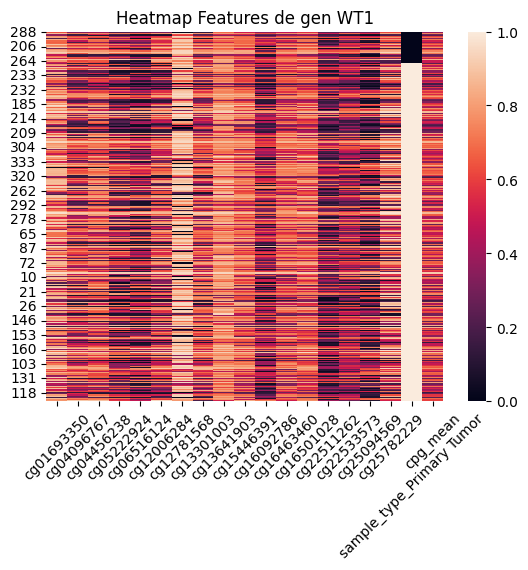

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Heatmap de features menos correlacionadas
hm = sns.heatmap(df_wt1)
plt.title('Heatmap Features de gen WT1')
plt.xticks(rotation=45)
plt.show()

In [ ]:
ALX4_cpg = get_gene_cpg(features_genes, 'ALX4')
df_ALX4 = get_cpg_met(datita, ALX4_cpg)
df_ALX4


,cg00061629,cg00418150,cg04549333,cg04970352,cg04988423,cg07696033,cg11260848,cg13807496,cg14144305,cg14753432,cg15522957,cg15817236,cg18546622,cg19358442,cg25363445,cg26365854,sample_type_Primary Tumor,cpg_mean
288,0.582837,0.589595,0.275936,0.518712,0.012507,0.202498,0.399971,0.063453,0.220164,0.559208,0.551002,0.024716,0.407625,0.357562,0.000000,0.181305,0.0,0.309193
315,0.951447,0.652814,0.597084,0.551700,0.584967,0.511419,0.688249,0.331916,0.568244,0.701479,0.797914,0.237887,0.728088,0.531703,0.460398,0.582973,0.0,0.592393
77,0.422891,0.606173,0.037199,0.126300,0.028882,0.056469,0.074990,0.056172,0.039491,0.546048,0.454312,0.028081,0.352954,0.068267,0.090195,0.011107,0.0,0.187471
269,0.496471,0.377525,0.262774,0.266354,0.014240,0.083171,0.221842,0.070874,0.184681,0.561144,0.501968,0.019444,0.355192,0.376417,0.174180,0.179356,0.0,0.259102
25,0.783684,0.623286,0.502378,0.647735,0.533992,0.332307,0.538512,0.395555,0.443002,0.586410,0.602180,0.581881,0.519148,0.559158,0.000000,0.558097,0.0,0.512958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.923057,0.490935,0.618219,0.771925,0.022363,0.604108,0.692169,0.055093,0.556097,0.645919,0.700761,0.039980,0.680004,0.446414,0.675302,0.027869,1.0,0.496888
113,0.841329,0.647510,0.338699,0.212599,0.063775,0.103553,0.173340,0.052643,0.315978,0.710128,0.700253,0.053783,0.671425,0.413061,0.000000,0.160598,1.0,0.341167
112,0.896577,0.263047,0.435547,0.172056,0.010167,0.376805,0.617378,0.149817,0.426714,0.729761,0.735338,0.027987,0.636851,0.499309,0.000000,0.053178,1.0,0.376908
120,0.806548,0.551315,0.714614,0.083113,0.107082,0.497235,0.722034,0.628923,0.582180,0.694773,0.798610,0.552063,0.203190,0.712214,0.427626,0.537332,1.0,0.538678


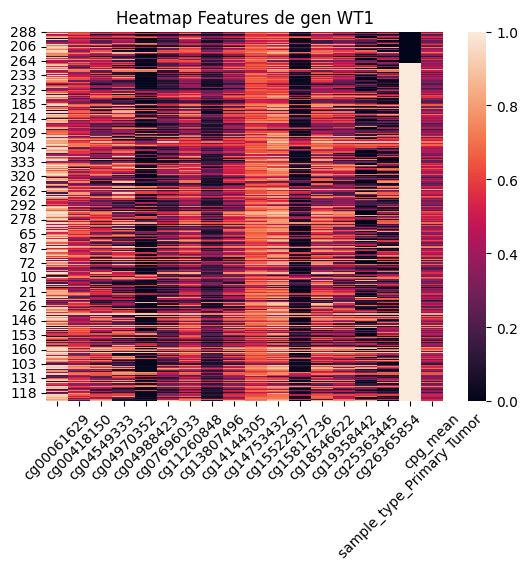

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Heatmap de features menos correlacionadas
hm = sns.heatmap(df_ALX4)
plt.title('Heatmap Features de gen WT1')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Agregar las columnas "age", "race", "etnia" y "tumor" a df_27k_tgc_filtrado
df_wt1 = pd.concat([df_wt1, df[['age', 'race', 'etnia', 'tumor']]], axis=1)

import pandas as pd

# Crear los rangos de edad
rango_edad = pd.cut(df_wt1['age'], bins=range(0, 101, 10), right=False)

# Asignar niveles a cada rango de edad
niveles_edad, _ = pd.factorize(rango_edad, sort=True)

# Agregar la columna de niveles de edad al DataFrame original
df_wt1['Nivel Edad'] = niveles_edad + 1

# Verificar el nuevo DataFrame filtrado
df_wt1.head(5)




,cg01693350,cg04096767,cg04456238,cg05222924,cg06516124,cg12006284,cg12781568,cg13301003,cg13641903,cg15446391,...,cg22533573,cg25094569,cg25782229,sample_type_Primary Tumor,cpg_mean,age,race,etnia,tumor,Nivel Edad
288,0.635302,0.345466,0.383593,0.219723,0.268240,0.319259,0.000000,0.132311,0.685092,0.510035,...,0.277773,0.299256,0.618058,0.0,0.374019,23667.0,asian,not hispanic or latino,1,0
315,0.878746,0.749319,0.754374,0.736334,0.687232,0.778192,0.956790,0.772866,0.803412,0.772241,...,0.678960,0.561196,0.824115,0.0,0.745150,27121.0,not reported,not reported,1,0
77,0.370243,0.150205,0.515241,0.186895,0.053055,0.085768,0.623678,0.223490,0.524596,0.526945,...,0.121216,0.043311,0.209320,0.0,0.282343,25974.0,black or african american,not hispanic or latino,1,0
269,0.352670,0.165314,0.088436,0.110464,0.069864,0.067039,0.578698,0.257580,0.349828,0.304822,...,0.098727,0.040955,0.191753,0.0,0.219971,20678.0,white,not hispanic or latino,0,0
25,0.774698,0.616955,0.657680,0.362764,0.488056,0.555363,0.931750,0.610205,0.755778,0.669112,...,0.543728,0.494445,0.630815,0.0,0.588554,22858.0,not reported,not reported,1,0


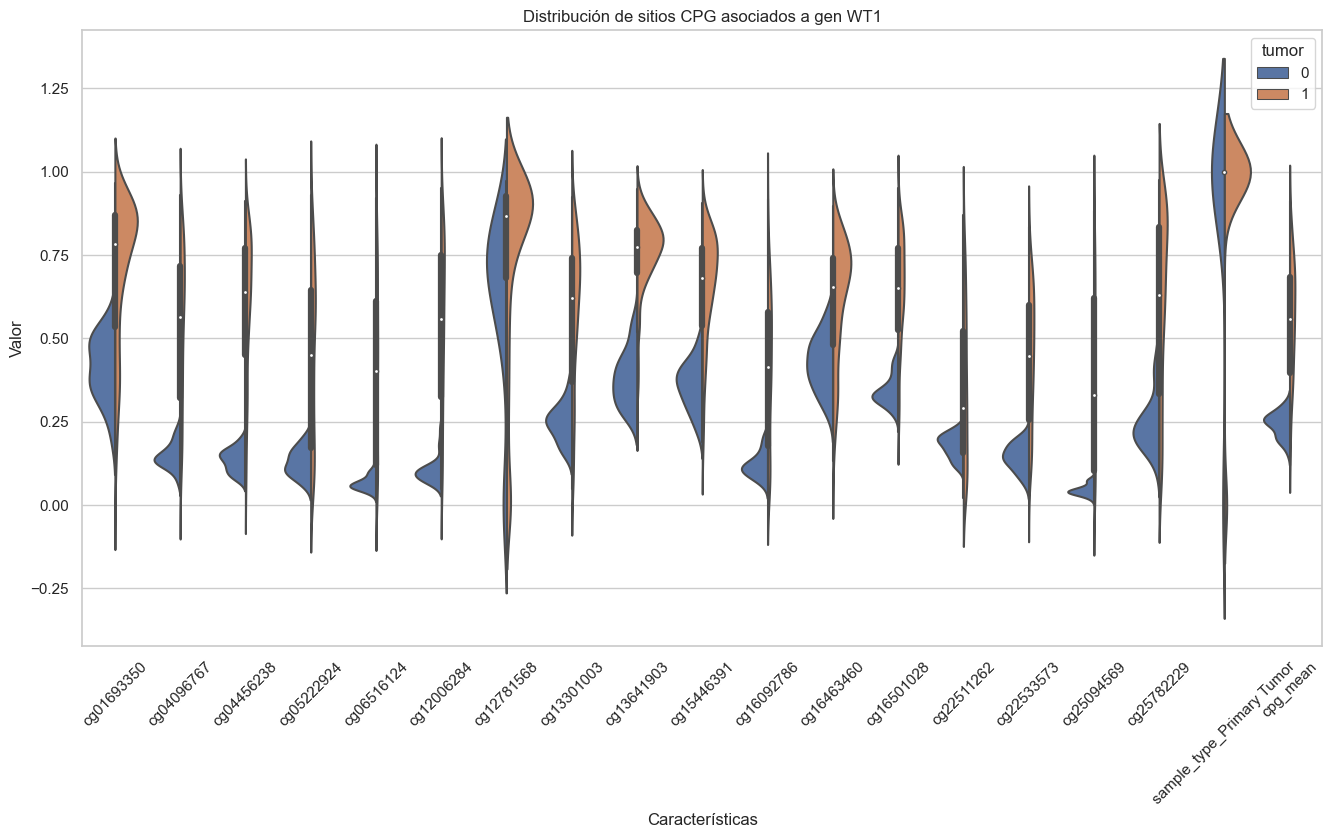

In [ ]:
import seaborn as sns
import matplotlib. pyplot as plt

# Crear un DataFrame solo con las características seleccionadas y la clase 'tumor'
data = df_wt1.drop(['race', 'etnia', 'age', 'Nivel Edad'], axis=1)

# Convertir los datos al formato largo (long format) para la visualización de violín
data_melted = data.melt(id_vars='tumor', var_name='Feature', value_name='Value')

# Crear la visualización de violín utilizando seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.violinplot(x='Feature', y='Value', hue='tumor', data=data_melted, split=True)
plt.xticks(rotation=45)
plt.title("Distribución de sitios CPG asociados a gen WT1")
plt.xlabel("Características")
plt.ylabel("Valor")
plt.show()

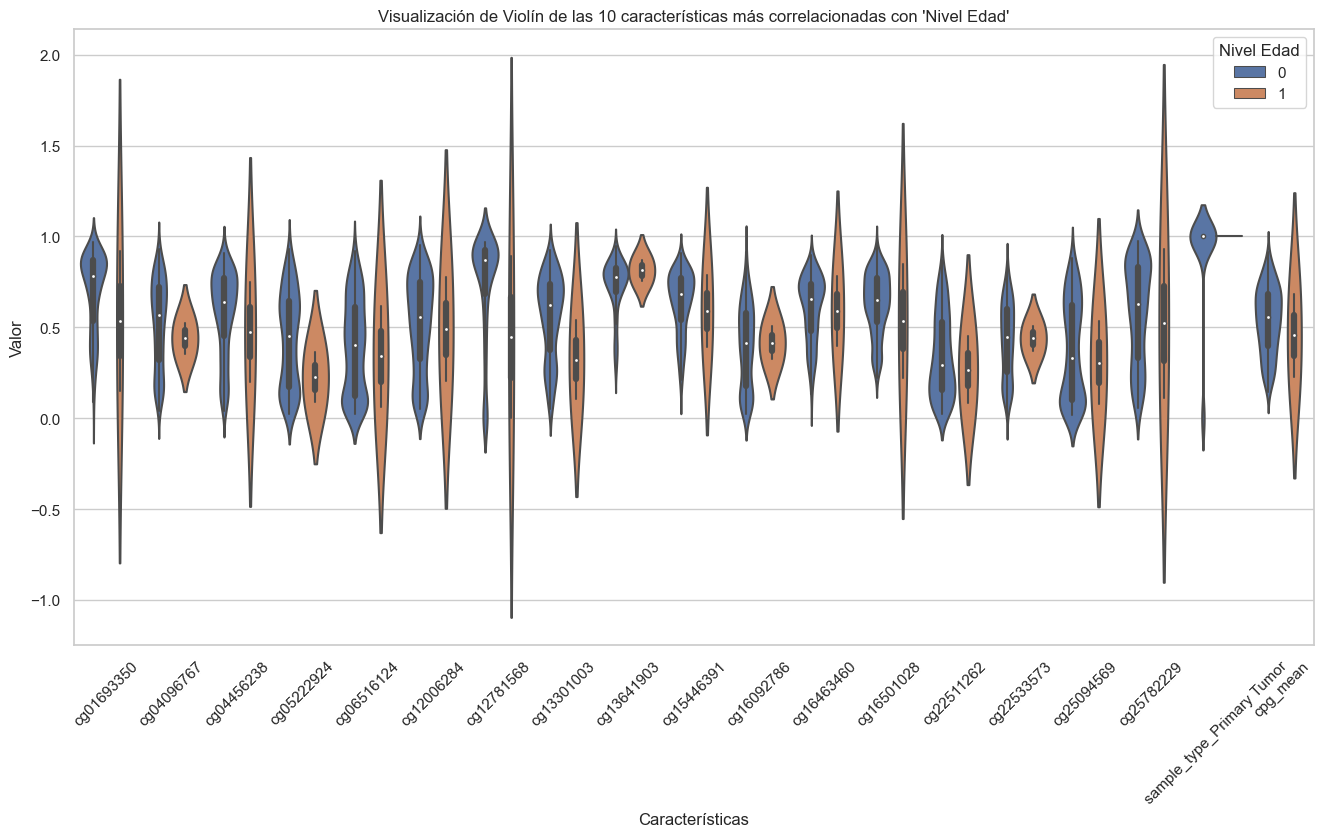

In [ ]:
# Crear un DataFrame solo con las características seleccionadas y la clase 'tumor'
data = df_wt1.drop(['race', 'etnia', 'tumor', 'age'], axis=1)

# Convertir los datos al formato largo (long format) para la visualización de violín
data_melted = data.melt(id_vars='Nivel Edad', var_name='Feature', value_name='Value')

# Crear la visualización de violín utilizando seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.violinplot(x='Feature', y='Value', hue='Nivel Edad', data=data_melted)
plt.xticks(rotation=45)
plt.title("Visualización de Violín de las 10 características más correlacionadas con 'Nivel Edad'")
plt.xlabel("Características")
plt.ylabel("Valor")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'df_27k_tgc' es un DataFrame con las características y la clase 'tumor'

correlations = df.corrwith(df['tumor']).abs().sort_values(ascending=False)
top_10_features = correlations.index[1:11]

C:\Users\bluea\AppData\Local\Temp\ipykernel_24608\3338227562.py:6: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corrwith(df['tumor']).abs().sort_values(ascending=False)


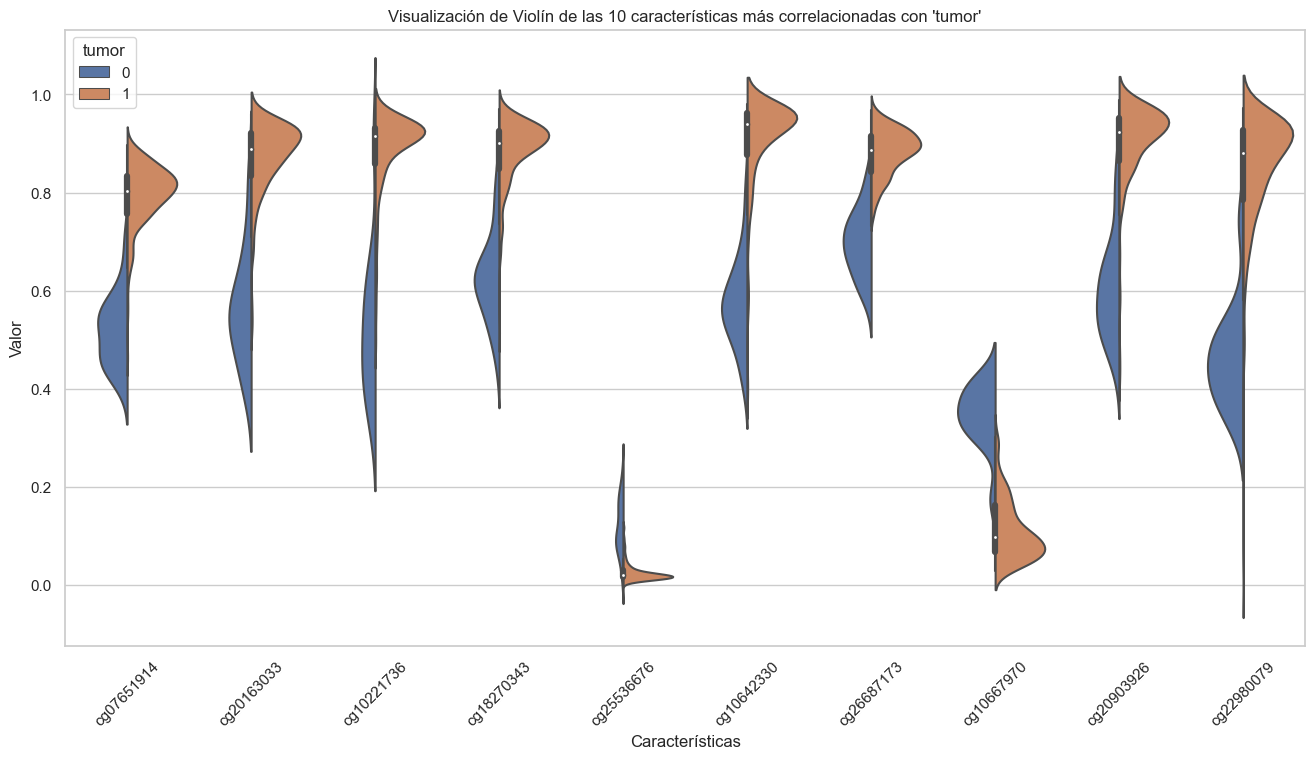

In [ ]:
# Crear un DataFrame solo con las características seleccionadas y la clase 'tumor'
data = df[top_10_features.tolist() + ['tumor']]

# Convertir los datos al formato largo (long format) para la visualización de violín
data_melted = data.melt(id_vars='tumor', var_name='Feature', value_name='Value')

# Crear la visualización de violín utilizando seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.violinplot(x='Feature', y='Value', hue='tumor', data=data_melted, split=True)
plt.xticks(rotation=45)
plt.title("Visualización de Violín de las 10 características más correlacionadas con 'tumor'")
plt.xlabel("Características")
plt.ylabel("Valor")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combina las características y el objetivo en un solo DataFrame
df_balanced = pd.DataFrame(X, columns=df.columns[:-1])
df_balanced['tumor'] = Y

# Calcula las correlaciones entre las características y la clase 'tumor'
correlations = df_balanced.drop('tumor', axis=1).corrwith(df_balanced['tumor']).abs().sort_values(ascending=False)
top_10_features = correlations.index[:10]

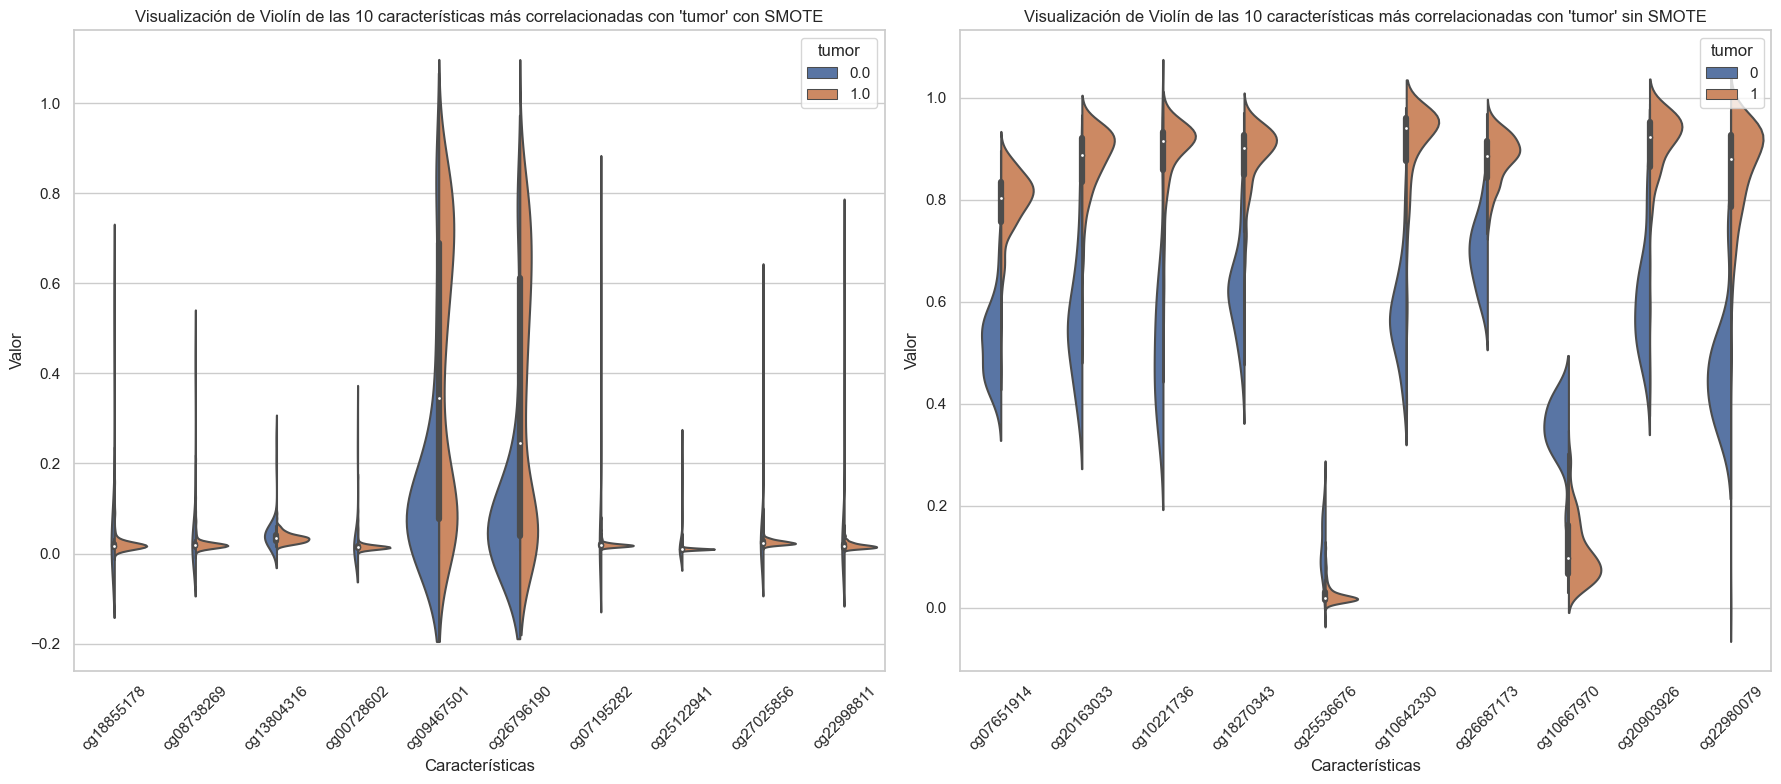

In [ ]:
# Crea el DataFrame con las características seleccionadas
data_balanced = df_balanced[top_10_features.tolist() + ['tumor']]

# Convierte los datos al formato largo (long format) para la visualización de violín
data_melted_balanced = data_balanced.melt(id_vars='tumor', var_name='Feature', value_name='Value')

# Crear la visualización de violín utilizando seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.violinplot(x='Feature', y='Value', hue='tumor', data=data_melted_balanced, split=True)
plt.xticks(rotation=45)
plt.title("Visualización de Violín de las 10 características más correlacionadas con 'tumor' con SMOTE")
plt.xlabel("Características")
plt.ylabel("Valor")

# Crear la visualización de violín utilizando seaborn datos sin SMOTE
sns.set(style="whitegrid")
plt.subplot(1, 2, 2)
sns.violinplot(x='Feature', y='Value', hue='tumor', data=data_melted, split=True)
plt.xticks(rotation=45)
plt.title("Visualización de Violín de las 10 características más correlacionadas con 'tumor' sin SMOTE")
plt.xlabel("Características")
plt.ylabel("Valor")
# Mostrar los gráficos
plt.tight_layout()
plt.show()